In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests



In [34]:
#  model
from transformers import AutoProcessor, BlipForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")



# Initialize the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [35]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

In [73]:
##image URLs
img_urls = [
    "https://media.istockphoto.com/id/1354989842/photo/banner-with-books-business-and-education-background-back-to-school-concept.jpg?b=1&s=612x612&w=0&k=20&c=vtxN2cubZQLopT5zWdag5fcLAoiXehrCcyOMnqUNReQ=",
    "https://images.pexels.com/photos/6017481/pexels-photo-6017481.jpeg?auto=compress&cs=tinysrgb&dpr=2&w=252&fit=crop&h=408",
    "https://images.pexels.com/photos/1721934/pexels-photo-1721934.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/1595385/pexels-photo-1595385.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/434295/pexels-photo-434295.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/46174/strawberries-berries-fruit-freshness-46174.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/3338681/pexels-photo-3338681.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/347134/pexels-photo-347134.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/46148/aircraft-jet-landing-cloud-46148.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/1530423/pexels-photo-1530423.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/355508/pexels-photo-355508.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/459976/pexels-photo-459976.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/1028741/pexels-photo-1028741.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/416528/pexels-photo-416528.jpeg?auto=compress&cs=tinysrgb&w=600",
    "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&w=600"
]


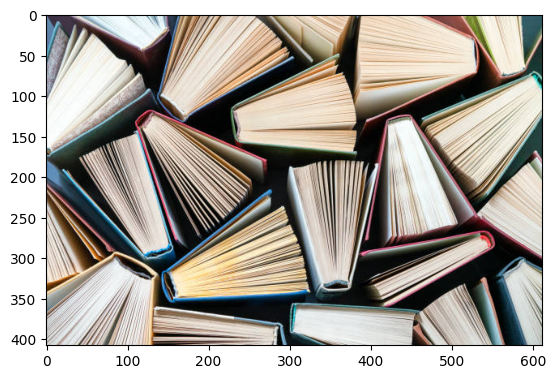

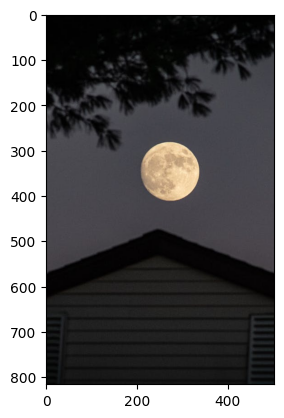

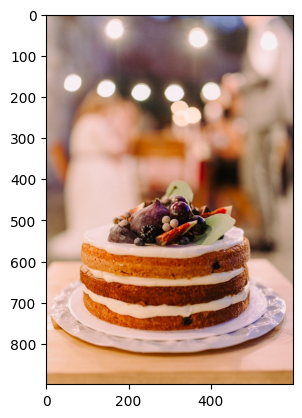

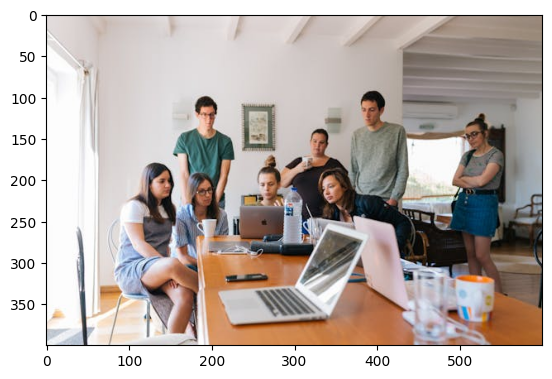

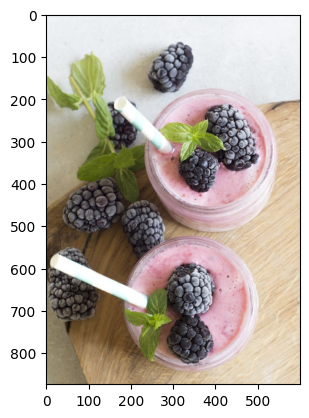

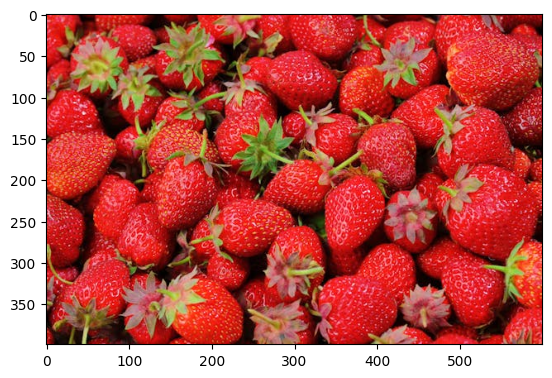

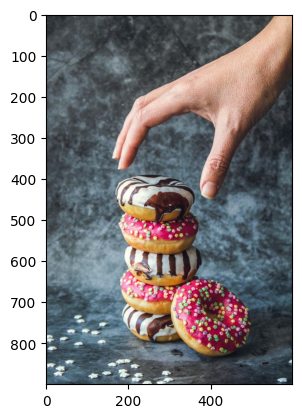

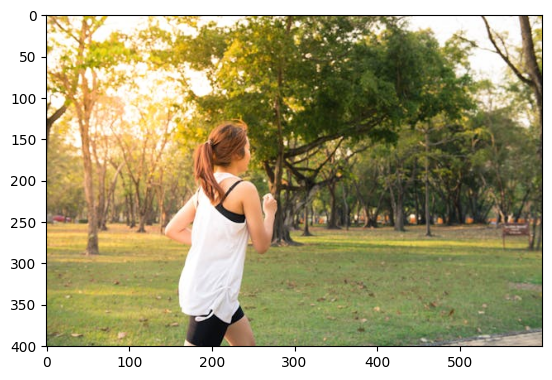

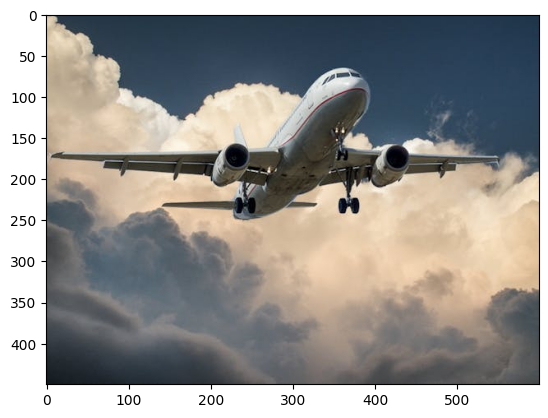

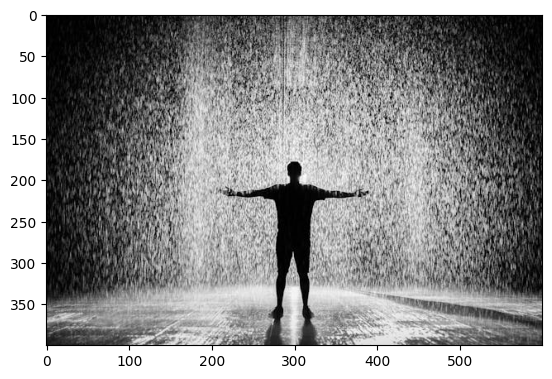

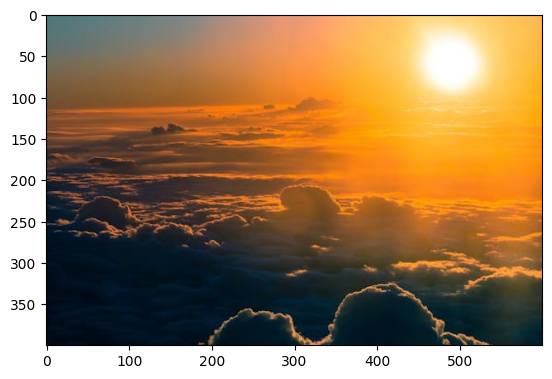

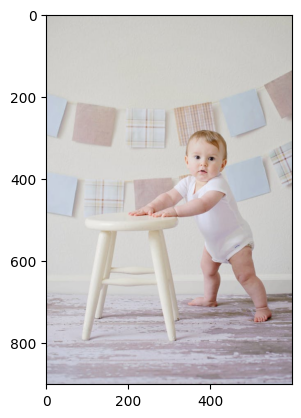

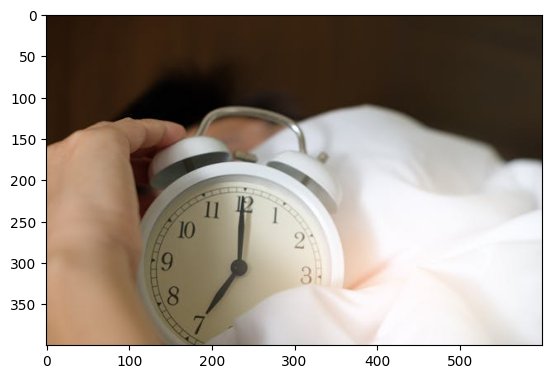

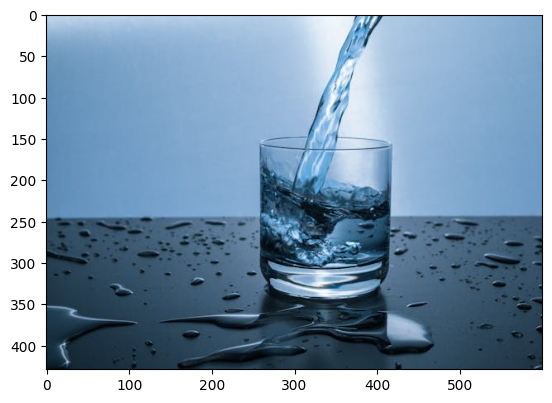

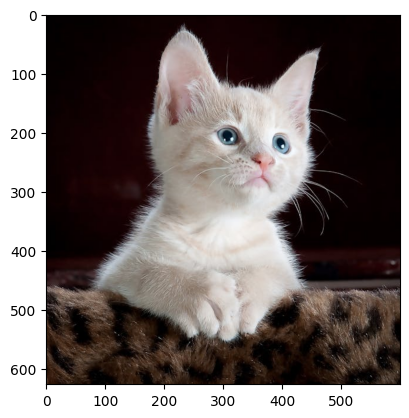

In [76]:
images = [Image.open(requests.get(url, stream=True).raw) for url in urls]

#photo
for image in images:
    plt.show(plt.imshow(np.asarray(image)))
inputs = processor(images, return_tensors="pt")
out = model.generate(**inputs)


In [79]:
#print the captions

for img_url in img_urls:
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

    inputs = processor(raw_image, return_tensors="pt")
    out = model.generate(**inputs)
    print( processor.decode(out[0], skip_special_tokens=True))


a pile of books
the moon is seen over a house in the neighborhood
a cake on a plate with a candle in the background
a group of people sitting around a table
blackberry smoothie with fresh blackberry and blackberry
a bowl full of strawberries
a hand reaching into a stack of donut donut donut donut donut donut
a woman running in the park
a plane flying through the clouds
a man standing in front of a wall of rain
a sunset over the clouds
a baby boy in a white bodysuit standing on a stool
a person holding a clock in their hand
water being poured into a glass
a kitten with blue eyes sitting on a leopard print


In [16]:
captions = ["Reading books helps increase knowledge",
            "The full moon appears once a month",
            "birthday cake",
            "working in groups much better than working alon",
            "drinking smoothies have a lot of vitamins",
            "Strawberries are red",
            "Donuts are full of calories",
            "Exercise helps maintain health",
            "Waking up early helps achievement",
            "Water keeps skin healthy",
            "A child tries to stand up",
            "sun rais at the morning",
            "Air travel",
            "The cat is a pet",
            "rainy man"]
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs

tensor([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 14,  8, 10,  8,  9, 13])